# Cyclic Descision Tree
## By Christian Koutsandreas

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# load results dataframe from memory
results_df = pd.read_pickle('dec_tree_pre_trained.pkl') 

Lets plot hyper paramater mean validation accuracy.

In [ ]:
mean_hyper_param_acc = results_df.groupby(["criterion", "splitter"])["validation_accuracy"].mean().squeeze().sort_values(ascending = False)
mean_hyper_param_acc.plot.bar(color='tab:orange', edgecolor = "black", zorder = 2)
plt.title("Mean Validation Accuracy by Hyper Paramaters ("+str(results_df.shape[0]//6)+", 70/30 Tests )")
plt.ylabel("Validation Accuracy")
plt.xlabel("Hyper Paramater Combination")
plt.grid(axis="y", zorder = 0)

I wish to better understand how tree depth influences model performance. Lets scatter plot the relationship.

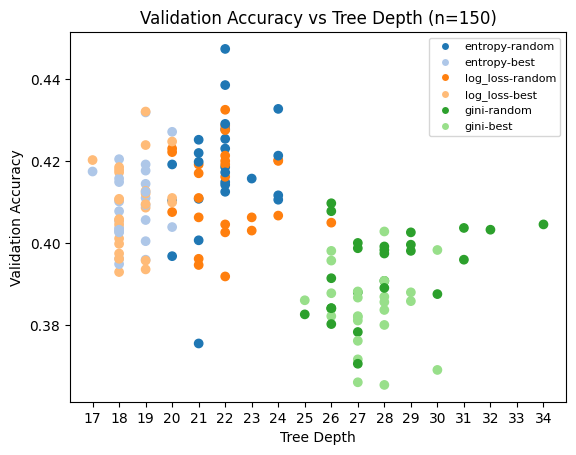

In [5]:
colors = results_df['criterion'] + '-' + results_df['splitter']
color_map = dict(zip(colors.unique(), plt.cm.tab20.colors))


plt.scatter(results_df["model_object"].apply(lambda x: x.tree_.max_depth), results_df["validation_accuracy"], c=[color_map[c] for c in colors])
plt.title("Validation Accuracy vs Tree Depth (n="+str(results_df.shape[0])+')')
plt.ylabel('Validation Accuracy')
plt.xlabel('Tree Depth')
plt.xticks(range(results_df["model_object"].apply(lambda x: x.tree_.max_depth).min(), results_df["model_object"].apply(lambda x: x.tree_.max_depth).max()+1))

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=color, markerfacecolor=color_map[color]) for color in colors.unique()]
plt.legend(handles=legend_elements, prop={'size': 8})
plt
plt.show()

In [6]:
results_df["model_object"].apply(lambda x: x.tree_.max_depth).min()

17

Now lets see the average training time of each set of hyper paramaters and if greater training time results in greater validation accuracy.

Text(0.5, 0, 'Hyper Paramater Combination')

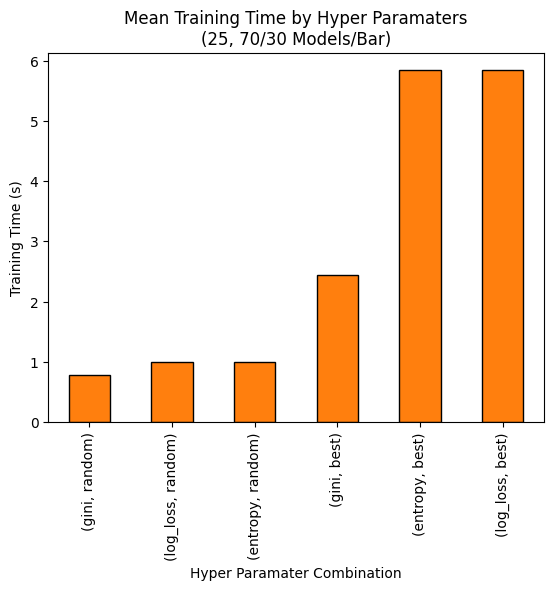

In [7]:
mean_hyper_param_ttime = results_df.groupby(["criterion", "splitter"])["training_time"].mean().squeeze().sort_values()
mean_hyper_param_ttime.plot.bar(color='tab:orange', edgecolor = "black")
plt.title("Mean Training Time by Hyper Paramaters\n("+str(results_df.shape[0]//6)+", 70/30 Models/Bar)")
plt.ylabel("Training Time (s)")
plt.xlabel("Hyper Paramater Combination")

Random splitting allows for significantly faster training though on average performs worse. That being said upon training several random models commonly a given random splitting model is ablel to acheive the best validation accuracy.

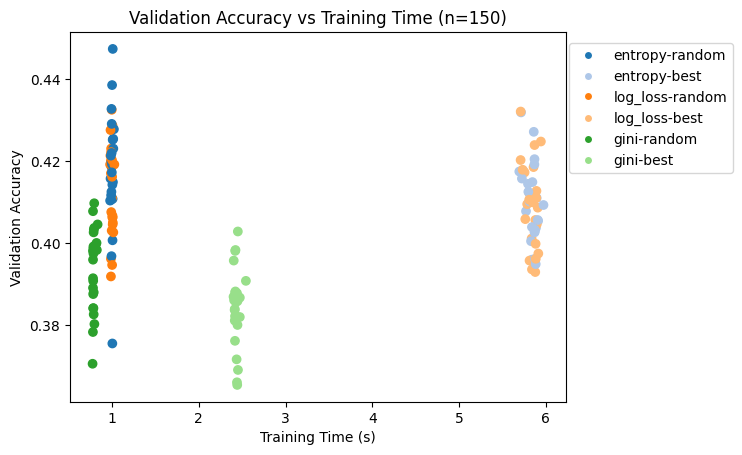

In [8]:
colors = results_df['criterion'] + '-' + results_df['splitter']
color_map = dict(zip(colors.unique(), plt.cm.tab20.colors))
plt.scatter(results_df["training_time"], results_df["validation_accuracy"], c=[color_map[c] for c in colors])
plt.title("Validation Accuracy vs Training Time (n="+str(results_df.shape[0])+')')
plt.ylabel('Validation Accuracy')
plt.xlabel('Training Time (s)')
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=color, markerfacecolor=color_map[color]) for color in colors.unique()]
plt.legend(handles=legend_elements, prop={'size': 10}, loc="lower right", bbox_to_anchor=(1.35, .6))
plt.show()